# Gráfico

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

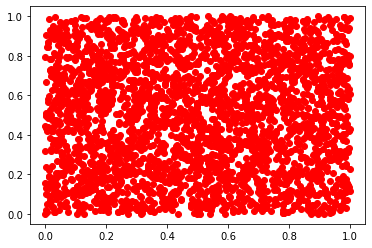

In [25]:
MAX = 3000
a = 16807
c = 0
#M = 1024.
M = 2 ** 31 - 1

i = 0
result = 11
x = []
y = []
lista = []

for i in range(0, MAX):
    anterior = result
    result = ((a * anterior) + c) % M

    x.append(anterior/M)
    y.append(result/M)
        
    lista.append(result/M)

plt.plot(x,y,'ro')
plt.show()


# Média e Desvio padrão

In [8]:
soma = 0

for i in range(0, MAX_LISTA):
    for j in range(0, MAX_RODADAS):
        soma+=lista[i][j]
    media = soma/MAX_LISTA
    print("Media: ", media)
    #print(np.average(lista))
    print("Desvio padrão: ", np.std(lista))
    print("")

Media:  0.4179491896829214
Desvio padrão:  0.3228949852599153

Media:  0.8358983793658428
Desvio padrão:  0.3228949852599153

Media:  1.2538475690487643
Desvio padrão:  0.3228949852599153

Media:  1.6717967587316855
Desvio padrão:  0.3228949852599153

Media:  2.089745948414607
Desvio padrão:  0.3228949852599153



# Correlação

In [9]:
somaMultXY = 0
somaX = 0
somaY = 0
somaX2 = 0
somaY2 = 0

for i in range(MAX_LISTA - 1):
    somaMultXY += x[i] * y[i]
    
    somaX += x[i]
    somaY += y[i]
    
    
    somaX2 += x[i] ** 2
    somaY2 += y[i] ** 2
    
numerador = (MAX_LISTA * somaMultXY - (somaX * somaY))
denominador = (math.sqrt((MAX_LISTA * somaX2) - (somaX ** 2))) * (math.sqrt((MAX_LISTA * somaY2) - (somaY ** 2)))
correlacao = numerador / denominador

print("Correlacao: ", correlacao)

Correlacao:  0.2832059447339336


# Covariância

In [10]:
covariancia = numerador / (MAX_LISTA * (MAX_LISTA-1))
print("Covariancia: ", covariancia)

Covariancia:  0.04717090573651737


# Qui Quadrado

In [11]:
somaQui = 0

intervalos = [[0,0.1],[0.1,0.2],[0.2,0.3],[0.3,0.4],[0.4,0.5],[0.5,0.6],[0.6,0.7],[0.7,0.8],[0.8,0.9],[0.9,1]]
n = []

contag = 0

for i in range(10):
    for j in range(0, MAX_LISTA):
        if x[j] >= intervalos[i][0] and x[j] < intervalos[i][1]:
            contag += 1
    n.append(contag)
    contag = 0

for i in range(10):
    numerador = (n[i] - (MAX_LISTA / 10)) ** 2
    denominador = MAX_LISTA  / 10
    somaQui += numerador / denominador
    
print(f'Qui Quadrado = {somaQui}')

Qui Quadrado = 9.0


# Monte Carlo

In [12]:
a = 3
b = 5

f = []

for i in range(MAX_LISTA):
    f.append((b-a) * y[i] + a)

# Distribuição Exponencial

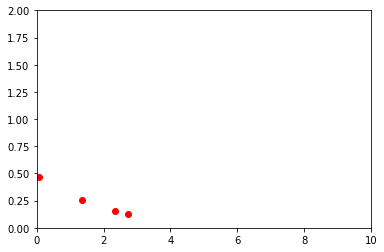

In [13]:
alpha = 1 / media
fdx = []
exp = []
maiorFDX = 0

for i in range(MAX_LISTA):
    numerador = math.log(y[i])
    
    fdx.append(-1 * (numerador / alpha))
    

for i in range(MAX_LISTA):
    exp.append(alpha * math.exp(-1 * alpha * fdx[i]))
    
axis = [0,10,0,2]
plt.plot(fdx, exp, 'ro')
plt.axis(axis)
plt.show()

# Weibull

# Erlang

# Monte Carlo Triangular

# Normal

# Poisson

# Simulador

In [ ]:
pip install plotly==5.18.0

In [30]:
import math
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

def truncar(lista1):
    listaAux = []
    for i in range(len(lista1)):
        listaAux.append(round(lista1[i], 4))
    return listaAux

size = 1000

Cliente = []
TEC = []
TS = []
#TEC = [2, 5, 1, 2, 12]
#TS = [3, 4, 6, 3, 2]
TempoChegada = []
TempoInicioServico = []
TempoFimServico = []
TempoFila = []
TempoNoSistema = []
TempoOciosoFuncionario = []

TempoMedioNaFila = 0
TempoMedioDeServico = 0
TempoMedioNoSistema = 0

for i in range(0, size):
    Cliente.append(i)
    TEC.append(-20 * math.log(lista[i]))
    TS.append((-5 * math.log(lista[i]))  + 20)
    if i == 0:
        TempoChegada.append(TEC[i])
    else:
        TempoChegada.append(TEC[i] + TempoChegada[i - 1])

    if i == 0:
        TempoInicioServico.append(TempoChegada[i])
    elif TempoChegada[i] <= TempoFimServico[i - 1]:
        TempoInicioServico.append(TempoFimServico[i - 1])
    else:
        TempoInicioServico.append(TempoChegada[i])

    TempoFimServico.append(TempoInicioServico[i] + TS[i])
    TempoFila.append(TempoInicioServico[i] - TempoChegada[i])
    TempoNoSistema.append(TS[i] + TempoFila[i])
    
    if i == 0:
        TempoOciosoFuncionario.append(TempoInicioServico[i])
    else:
        TempoOciosoFuncionario.append(TempoInicioServico[i] - TempoFimServico[i-1])
 
    TempoMedioNaFila = TempoMedioNaFila + TempoFila[i]
    TempoMedioDeServico = TempoMedioDeServico + TS[i]
    TempoMedioNoSistema = TempoMedioNoSistema + TempoFila[i] + TS[i]
    
    
fig = go.Figure(data=[go.Table(header=dict(values=['Cliente', 'TEC', 'TS', 'TempoChegada', 'TempoInicioServico', 'TempoFimServico', 'TempoFila', 'TempoNoSistema', 'TempoOciosoFuncionario']),
                 cells=dict(values=[Cliente, truncar(TEC), truncar(TS), truncar(TempoChegada), truncar(TempoInicioServico), truncar(TempoFimServico), truncar(TempoFila), truncar(TempoNoSistema), truncar(TempoOciosoFuncionario)]))])
fig.show()

TempoMedioNaFila = TempoMedioNaFila / size
TempoMedioDeServico = TempoMedioDeServico / size
TempoMedioNoSistema = TempoMedioNoSistema / size

In [ ]:
print(round(TempoMedioNaFila, 4))
print(round(TempoMedioDeServico, 4))
print(round(TempoMedioNoSistema, 4))